Linear regression을 학습하며, 기계학습의 원리 및 TensorFlow를 익히는 notebook입니다. 

**라이브러리 Import 하기**

In [1]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data (given)**

In [4]:
x_train = [1, 2, 3, 4, 5]
# y_train = [2, 4, 6, 8, 10]

y_train = [3, 5, 7, 9, 11] # y = 2x + 1, w=2, b=1이 나와야 함

signal_length = len(x_train)
y_noise = np.random.normal(0,1, signal_length)

y_train = y_train + y_noise

# y_train = [2+0.1, 4-0.3, 6+0.15]  # 약간의 noise 추가 

# y_train = [2, 4, 6]   # x_train에 2배를 곱해서 생성 
# y_train = [3, 5, 7]

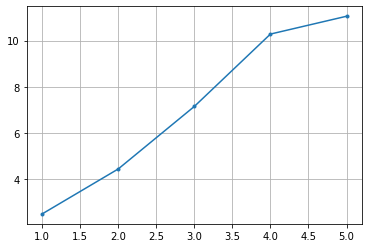

In [5]:
plt.plot(x_train, y_train,'.-')
plt.grid()

**Initialization**

In [6]:
useRandom = False

In [7]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name = 'bias')
else:
    w0 = 7.0;
    b0 = 5.0;

W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis XW+b**

$$ H(x) = Wx + b$$

In [8]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**



*   loss of one training example :
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 $$

In [9]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [11]:
sess = tf.Session()

**Initalizes global variables in the graph.**

In [12]:
sess.run(tf.global_variables_initializer())

In [13]:
nb_epoch = 2001
vloss = [] # empty list
vb = [] # empty list
vw = [] # empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)
    vw.append(w1)
    b1 = sess.run(b)
    vb.append(b1)
    
    if step % 50 == 0: # 50번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias

        print(step, '\t', loss1, '\t', w1, '\t', b1)

0 	 235.45505 	 5.6767044 	 4.6215577
50 	 1.6454475 	 1.5382981 	 2.9283702
100 	 1.2491834 	 1.6570688 	 2.499548
150 	 0.96675825 	 1.757343 	 2.1375256
200 	 0.7654692 	 1.841997 	 1.8318977
250 	 0.62200713 	 1.9134644 	 1.5738783
300 	 0.5197584 	 1.9737989 	 1.3560516
350 	 0.4468841 	 2.024735 	 1.1721561
400 	 0.3949453 	 2.0677366 	 1.0169066
450 	 0.3579276 	 2.1040394 	 0.8858413
500 	 0.33154455 	 2.1346874 	 0.77519256
550 	 0.31274068 	 2.1605613 	 0.6817799
600 	 0.29933888 	 2.1824045 	 0.6029187
650 	 0.28978732 	 2.2008455 	 0.5363419
700 	 0.28297952 	 2.2164135 	 0.48013598
750 	 0.27812758 	 2.2295566 	 0.43268538
800 	 0.27466944 	 2.2406523 	 0.39262655
850 	 0.27220473 	 2.2500196 	 0.35880733
900 	 0.27044827 	 2.2579277 	 0.3302565
950 	 0.26919633 	 2.264604 	 0.30615288
1000 	 0.26830417 	 2.2702403 	 0.28580412
1050 	 0.2676681 	 2.2749984 	 0.2686254
1100 	 0.26721478 	 2.2790155 	 0.25412259
1150 	 0.26689166 	 2.282407 	 0.24187854
1200 	 0.26666147 	 2

Text(0, 0.5, 'loss')

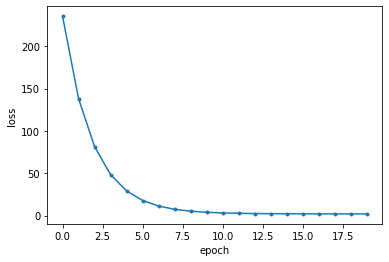

In [14]:
plt.plot(vloss[:20], '.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Weight')

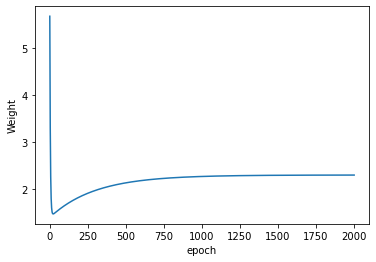

In [15]:
# W의 epoch에 따른 변화 그래프 

plt.plot(vw[:], '-')
plt.xlabel('epoch')
plt.ylabel('Weight')

Text(0, 0.5, 'Bias')

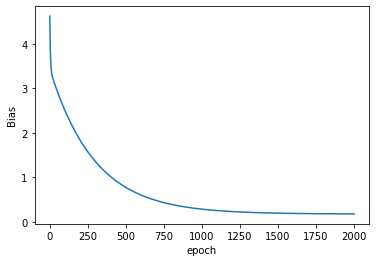

In [16]:
# b의 epoch에 따른 변화 그래프 
plt.plot(vb[:], '-')
plt.xlabel('epoch')
plt.ylabel('Bias')

**학습완료**

In [17]:
w1 = sess.run(W)[0] # 기울기 
b1 = sess.run(b)[0] # bias

출력해보기

In [18]:
print(w1, b1)

str1 = 'y = ' + str(w1) + 'x + ' + str(b1)
print(str1)

2.299753 0.17925407
y = 2.299753x + 0.17925407


Text(0.5, 1.0, 'y = 2.299753x + 0.17925407')

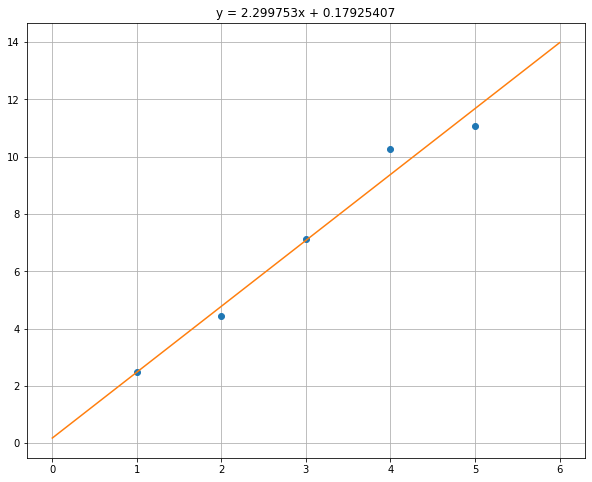

In [19]:
plt.figure(figsize=(10,8)) 
plt.plot(x_train, y_train, 'o') # train_data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함 
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1 , 
# np.max(y_train) + 1))
plt.title(str1)

### R-Squared Score

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [59]:
x = np.array(x_train)
y = np.array(y_train)
print(x.shape)
print(y.shape)

(5,)
(5,)


In [53]:
print(x_train)
print(y_train)

[1, 2, 3, 4, 5]
[ 2.47849435  4.42979334  7.14252268 10.28255483 11.05604576]


In [68]:
reg_y = []
for i in x_train:
    y2 = w1*x_train[i-1] + b1
    reg_y.append(y2)   # 예측값 

In [72]:
print(reg_y)

[2.4790070205926895, 4.7787599712610245, 7.078512921929359, 9.378265872597694, 11.67801882326603]


In [30]:
mean = np.mean(y_train)
print(mean)

7.077882190789319


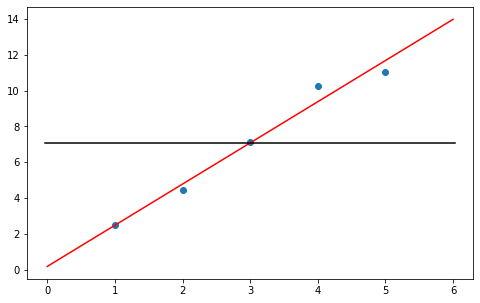

In [32]:
plt.figure(figsize=(8,5)) 
plt.plot(x_train, y_train, marker='o', linestyle = ' ')  # 실제값
plt.plot(x1, y1, color = 'red')  #regression line
plt.axhline(y = mean, xmin = 0.04, xmax = 0.96, color = 'black') #mean

##### MSE

$$ \frac{(실제값 - 에측값)^2}{데이터수} $$

In [76]:
# 실제값 = y_train
# 예측값 = reg_y
# 데이터 수 = 5
# avg_MSE = mean_squared_error(y_train, mean)
reg_MSE = mean_squared_error(y_train, reg_y)
print(mean_squared_error(y_train, reg_y))

0.266092848152131


In [82]:
err = 0
for i in range(len(x_train)):
    err += (y_train[i]-mean)**2
    
print(err)    

54.266633565673416


In [84]:
avg_MSE = err/5
print(avg_MSE)

10.853326713134683


##### R-Squared

In [86]:
r=1-(reg_MSE/avg_MSE)
print("R-squared : ", r)    

R-squared :  0.9754828307315115


In [87]:
print("평균 : ", mean)
print("MSE of regression line : ",reg_MSE)
print("MSE of average line : ", avg_MSE)
print("R-squared : ", r)

평균 :  7.077882190789319
MSE of regression line :  0.266092848152131
MSE of average line :  10.853326713134683
R-squared :  0.9754828307315115


### 스스로 해보기

**1번**

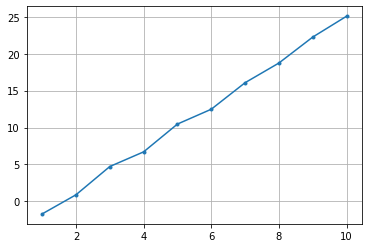

In [88]:
# X and Y data
x_train = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

y_train = [-2, 1, 4, 7, 10, 13, 16, 19, 22, 25]  # y = 3x - 5

signal_length = len(x_train)
y_noise = np.random.normal(0,1, signal_length)

y_train = y_train + y_noise

plt.plot(x_train, y_train,'.-')
plt.grid()

In [89]:
# initialization
useRandom = False

if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name = 'bias')
else:
    w0 = 9.0;
    b0 = 7.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

In [90]:
# Our hypothesis XW+b
hypothesis = x_train * W + b

# loss function 정의하기 
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [91]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph 
sess.run(tf.global_variables_initializer())

In [92]:
nb_epoch = 2001
vloss = [] # empty list
vb = [] # empty list
vw = [] # empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)
    vw.append(w1)
    b1 = sess.run(b)
    vb.append(b1)
    
    if step % 100 == 0: # 100번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step, '\t', loss1, '\t', w1, '\t', b1)

0 	 129.75056 	 3.063623 	 6.101374
100 	 10.637334 	 1.9700912 	 2.2038956
200 	 4.655111 	 2.3156788 	 -0.20202488
300 	 2.0768476 	 2.542556 	 -1.7815026
400 	 0.9656501 	 2.6915 	 -2.8184237
500 	 0.48673686 	 2.7892811 	 -3.4991593
600 	 0.28033176 	 2.8534741 	 -3.94606
700 	 0.19137384 	 2.8956163 	 -4.2394466
800 	 0.15303428 	 2.9232826 	 -4.432054
900 	 0.13651036 	 2.9414456 	 -4.5585012
1000 	 0.12938865 	 2.9533696 	 -4.641514
1100 	 0.12631908 	 2.9611976 	 -4.6960115
1200 	 0.12499621 	 2.9663367 	 -4.7317896
1300 	 0.12442617 	 2.9697106 	 -4.755278
1400 	 0.12418039 	 2.9719255 	 -4.7706966
1500 	 0.12407471 	 2.9733796 	 -4.780821
1600 	 0.12402879 	 2.9743342 	 -4.787466
1700 	 0.12400937 	 2.9749608 	 -4.791829
1800 	 0.1240008 	 2.975372 	 -4.7946916
1900 	 0.123996995 	 2.975642 	 -4.796571
2000 	 0.12399572 	 2.975819 	 -4.797804


Text(0, 0.5, 'loss')

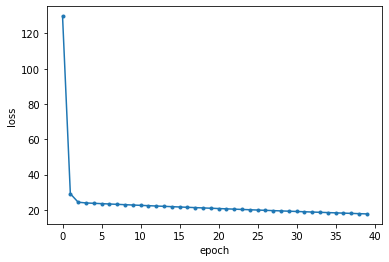

In [93]:
plt.plot(vloss[:40], '.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Weight')

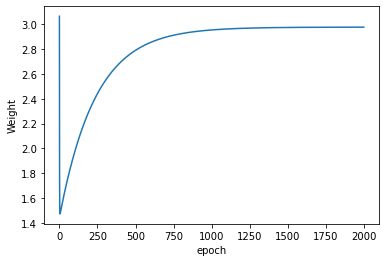

In [94]:
# W의 epoch에 따른 변화 그래프 
plt.plot(vw[:], '-')
plt.xlabel('epoch')
plt.ylabel('Weight')

Text(0, 0.5, 'Bias')

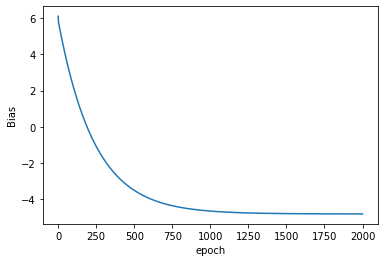

In [95]:
# b의 epoch에 따른 변화 그래프 
plt.plot(vb[:], '-')
plt.xlabel('epoch')
plt.ylabel('Bias')

In [96]:
# 학습완료
w1 = sess.run(W)[0] # 기울기 
b1 = sess.run(b)[0] # bias

In [97]:
# 출력해보기
print(w1, b1)

str1 = 'y = ' + str(w1) + 'x + ' + str(b1)
print(str1)

2.975819 -4.797804
y = 2.975819x + -4.797804


Text(0.5, 1.0, 'y = 2.975819x + -4.797804')

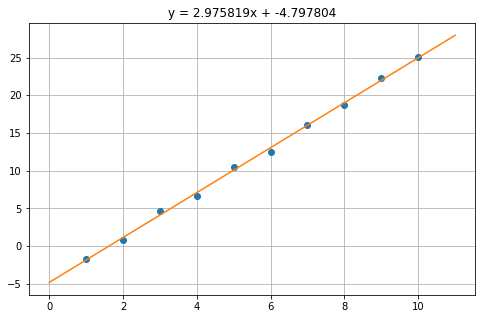

In [98]:
plt.figure(figsize=(8,5)) 
plt.plot(x_train, y_train, 'o') # train_data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함 
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
# plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1,
# np.max(y_train) + 1))
plt.title(str1)

### R-Squared Score

In [99]:
x = np.array(x_train)
y = np.array(y_train)
print(x.shape)
print(y.shape)

(10,)
(10,)


In [100]:
print(x_train)
print(y_train)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-1.71177622  0.88196089  4.71319227  6.70000699 10.46833532 12.47784596
 16.07446965 18.74092171 22.25832225 25.08378112]


In [101]:
reg_y = []
for i in x_train:
    y2 = w1*x_train[i-1] + b1
    reg_y.append(y2)   # 예측값 

print(reg_y)

[-1.8219847679138184, 1.153834342956543, 4.129653453826904, 7.105472564697266, 10.081291675567627, 13.057110786437988, 16.03292989730835, 19.00874900817871, 21.984568119049072, 24.960387229919434]


In [102]:
mean = np.mean(y_train)
print(mean)

11.568705993902556


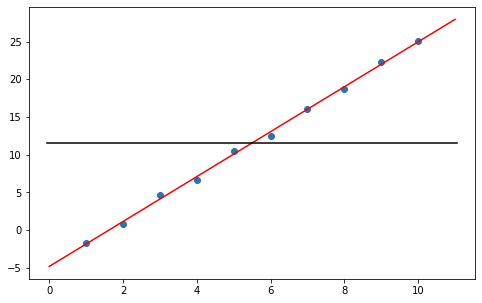

In [103]:
plt.figure(figsize=(8,5)) 
plt.plot(x_train, y_train, marker='o', linestyle = ' ')  # 실제값
plt.plot(x1, y1, color = 'red')  #regression line
plt.axhline(y = mean, xmin = 0.04, xmax = 0.96, color = 'black') #mean

##### MSE

$$ \frac{(실제값 - 에측값)^2}{데이터수} $$

In [104]:
# 실제값 = y_train
# 예측값 = reg_y
# 데이터 수 = 10
reg_MSE = mean_squared_error(y_train, reg_y)
print(mean_squared_error(y_train, reg_y))

0.12399558967136029


In [105]:
err = 0
for i in range(len(x_train)):
    err += (y_train[i]-mean)**2
    
print(err)    

731.9851141136303


In [106]:
avg_MSE = err/10
print(avg_MSE)

73.19851141136303


##### R-Squared

In [107]:
r=1-(reg_MSE/avg_MSE)
print("R-squared : ", r)    

R-squared :  0.9983060367310679


In [108]:
print("평균 : ", mean)
print("MSE of regression line : ",reg_MSE)
print("MSE of average line : ", avg_MSE)
print("R-squared : ", r)

평균 :  11.568705993902556
MSE of regression line :  0.12399558967136029
MSE of average line :  73.19851141136303
R-squared :  0.9983060367310679


**2번**

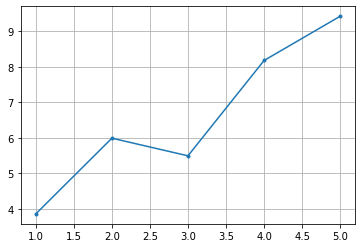

In [119]:
# X and Y data
x_train = [1, 2, 3, 4, 5]

y_train = [4.2, 5.4, 6.6, 7.8, 9.0]  # y = 1.2x + 3

signal_length = len(x_train)
y_noise = np.random.normal(0,1, signal_length)

y_train = y_train + y_noise

plt.plot(x_train, y_train,'.-')
plt.grid()

In [120]:
# initialization
useRandom = True

if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name = 'bias')
else:
    w0 = 5.0;
    b0 = 3.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

In [121]:
# Our hypothesis XW+b
hypothesis = x_train * W + b

# loss function 정의하기 
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [122]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph 
sess.run(tf.global_variables_initializer())

In [123]:
nb_epoch = 1001
vloss = [] # empty list
vb = [] # empty list
vw = [] # empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)
    vw.append(w1)
    b1 = sess.run(b)
    vb.append(b1)
    
    if step % 50 == 0: # 50번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias

        print(step, '\t', loss1, '\t', w1, '\t', b1)

0 	 3.3147335 	 2.1035442 	 -1.0460306
50 	 2.0311124 	 2.1683254 	 -0.42733032
100 	 1.5529855 	 2.037856 	 0.04370659
150 	 1.2122154 	 1.92771 	 0.44136825
200 	 0.9693425 	 1.8347219 	 0.7770849
250 	 0.79624283 	 1.756219 	 1.0605055
300 	 0.6728709 	 1.6899446 	 1.299777
350 	 0.584942 	 1.6339941 	 1.5017762
400 	 0.5222735 	 1.5867591 	 1.6723092
450 	 0.47760805 	 1.5468823 	 1.8162777
500 	 0.4457745 	 1.513217 	 1.9378197
550 	 0.42308584 	 1.4847959 	 2.040429
600 	 0.40691558 	 1.4608021 	 2.127054
650 	 0.3953906 	 1.4405459 	 2.2001853
700 	 0.38717657 	 1.4234452 	 2.2619243
750 	 0.3813222 	 1.4090081 	 2.3140464
800 	 0.37714976 	 1.3968202 	 2.358049
850 	 0.374176 	 1.3865309 	 2.3951967
900 	 0.37205657 	 1.3778442 	 2.426558
950 	 0.37054604 	 1.3705107 	 2.453035
1000 	 0.36946914 	 1.3643196 	 2.4753866


Text(0, 0.5, 'loss')

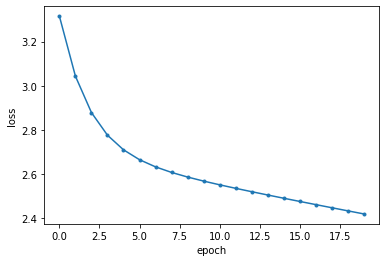

In [124]:
plt.plot(vloss[:20], '.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Weight')

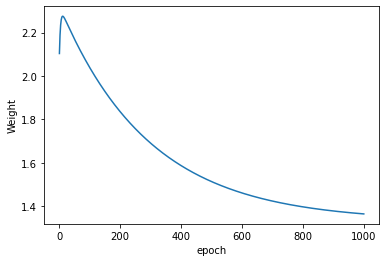

In [125]:
# W의 epoch에 따른 변화 그래프 
plt.plot(vw[:], '-')
plt.xlabel('epoch')
plt.ylabel('Weight')

Text(0, 0.5, 'Bias')

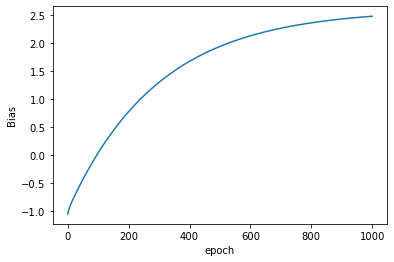

In [126]:
# b의 epoch에 따른 변화 그래프 
plt.plot(vb[:], '-')
plt.xlabel('epoch')
plt.ylabel('Bias')

In [127]:
# 학습완료
w1 = sess.run(W)[0] # 기울기 
b1 = sess.run(b)[0] # bias

In [128]:
# 출력해보기
print(w1, b1)

str1 = 'y = ' + str(w1) + 'x + ' + str(b1)
print(str1)

1.3643196 2.4753866
y = 1.3643196x + 2.4753866


Text(0.5, 1.0, 'y = 1.3643196x + 2.4753866')

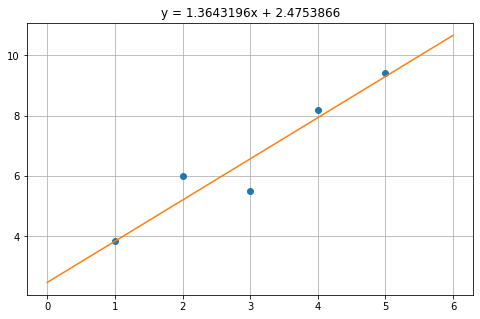

In [129]:
plt.figure(figsize=(8,5)) 
plt.plot(x_train, y_train, 'o') # train_data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함 
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
# plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1,
# np.max(y_train) + 1))
plt.title(str1)

### R-squared Score

In [130]:
x = np.array(x_train)
y = np.array(y_train)
print(x.shape)
print(y.shape)

(5,)
(5,)


In [131]:
print(x_train)
print(y_train)

[1, 2, 3, 4, 5]
[3.86038208 5.99101874 5.49474852 8.17649528 9.4214731 ]


In [132]:
reg_y = []
for i in x_train:
    y2 = w1*x_train[i-1] + b1
    reg_y.append(y2)   # 예측값 

print(reg_y)

[3.8397061824798584, 5.204025745391846, 6.568345308303833, 7.93266487121582, 9.296984434127808]


In [133]:
mean = np.mean(y_train)
print(mean)

6.588823542363466


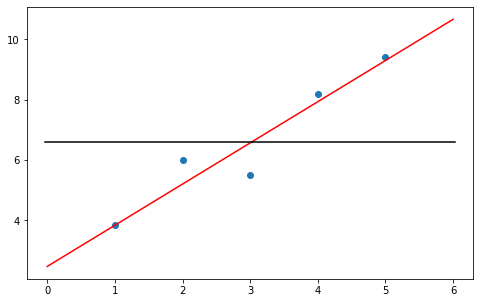

In [134]:
plt.figure(figsize=(8,5)) 
plt.plot(x_train, y_train, marker='o', linestyle = ' ')  # 실제값
plt.plot(x1, y1, color = 'red')  #regression line
plt.axhline(y = mean, xmin = 0.04, xmax = 0.96, color = 'black') #mean

##### MSE

$$ \frac{(실제값 - 에측값)^2}{데이터수} $$

In [135]:
# 실제값 = y_train
# 예측값 = reg_y
# 데이터 수 = 5
reg_MSE = mean_squared_error(y_train, reg_y)
print(mean_squared_error(y_train, reg_y))

0.3694692477577538


In [136]:
err = 0
for i in range(len(x_train)):
    err += (y_train[i]-mean)**2
    
print(err)    

19.54336862221357


In [137]:
avg_MSE = err/5
print(avg_MSE)

3.908673724442714


##### R-Squared

In [138]:
r=1-(reg_MSE/avg_MSE)
print("R-squared : ", r)   

R-squared :  0.9054745231234589


In [139]:
print("평균 : ", mean)
print("MSE of regression line : ",reg_MSE)
print("MSE of average line : ", avg_MSE)
print("R-squared : ", r)

평균 :  6.588823542363466
MSE of regression line :  0.3694692477577538
MSE of average line :  3.908673724442714
R-squared :  0.9054745231234589
